# Regressão linear simples

### Método dos mínimos quadrados

$$ R = \sum_{i=1}^{n}(y_i - M_i)^2 $$

#### Meu modelo
$$ M=b_0 + b_1x \\ b_0=? \\ b_1=?$$

$$ R=\sum_{i=1}^n(y_i - b_0 - b_1x_i)^2 $$

Quero calular $b_0$ e $b_1$ que minimizem $R$

$$
\begin{cases}
\frac{\partial R}{\partial b_0} = 0\\
\frac{\partial R}{\partial b_1} = 0
\end{cases}
$$

$$ \frac{\partial R}{\partial b_0} = -2 \sum_{i=1}^n(y_i - b_0 - b_1x_i) = 0 $$
$$ \frac{\partial R}{\partial b_1} = -2 \sum_{i=1}^n(y_i - b_0 - b_1x_i) = 0 $$

Reescrevendo


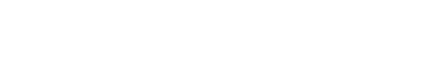

Para os dados, ajuste uma reta de mínimos quadrados

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Previsão para 10 °C:
Linear: 20.58 dias
Quadrático: 16.14 dias

Coeficiente de determinação R²:
Linear: 0.8906
Quadrático: 0.9813


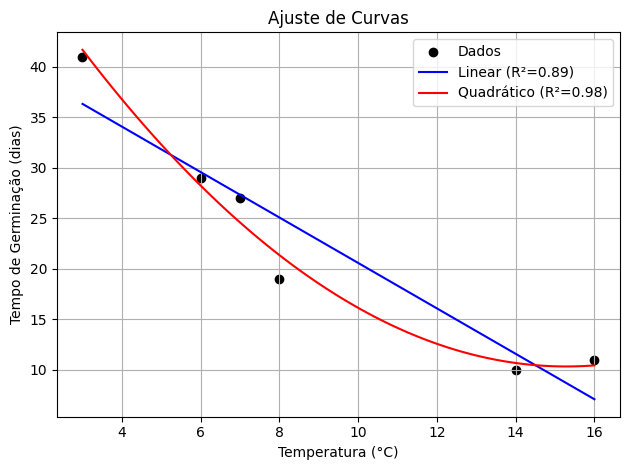

In [4]:
x = np.array([3, 6, 7, 8, 14, 16])
y = np.array([41, 29, 27, 19, 10, 11])

coef_lin = np.polyfit(x, y, deg=1)
modelo_lin = np.poly1d(coef_lin)

coef_quad = np.polyfit(x, y, deg=2)
modelo_quad = np.poly1d(coef_quad)

x_novo = 10
y_pred_lin = modelo_lin(x_novo)
y_pred_quad = modelo_quad(x_novo)

r2_lin = r2_score(y, modelo_lin(x))
r2_quad = r2_score(y, modelo_quad(x))

print("Previsão para 10 °C:")
print(f"Linear: {y_pred_lin:.2f} dias")
print(f"Quadrático: {y_pred_quad:.2f} dias")
print("\nCoeficiente de determinação R²:")
print(f"Linear: {r2_lin:.4f}")
print(f"Quadrático: {r2_quad:.4f}")

x_vals = np.linspace(min(x), max(x), 100)
plt.scatter(x, y, color='black', label='Dados')
plt.plot(x_vals, modelo_lin(x_vals), label=f'Linear (R²={r2_lin:.2f})', color='blue')
plt.plot(x_vals, modelo_quad(x_vals), label=f'Quadrático (R²={r2_quad:.2f})', color='red')
plt.xlabel("Temperatura (°C)")
plt.ylabel("Tempo de Germinação (dias)")
plt.title("Ajuste de Curvas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

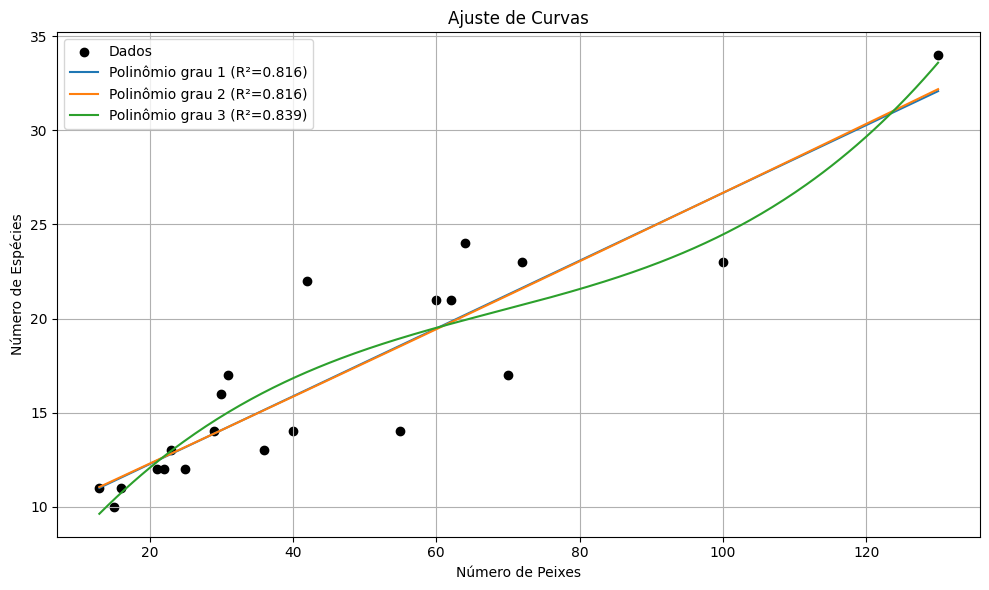

Melhor modelo: grau 3 com R² = 0.8388


In [5]:
x2 = np.array([13, 15, 16, 21, 22, 23, 25, 29, 30, 31, 36, 40, 42, 55, 60, 62, 64, 70, 72, 100, 130])
y2 = np.array([11, 10, 11, 12, 12, 13, 12, 14, 16, 17, 13, 14, 22, 14, 21, 21, 24, 17, 23, 23, 34])

graus = [1, 2, 3]
r2_values = {}
modelos = {}

for grau in graus:
    coef = np.polyfit(x2, y2, deg=grau)
    modelo = np.poly1d(coef)
    modelos[grau] = modelo
    y_pred = modelo(x2)
    r2_values[grau] = r2_score(y2, y_pred)

melhor_grau = max(r2_values, key=r2_values.get)

x_vals = np.linspace(min(x2), max(x2), 300)
plt.figure(figsize=(10, 6))
plt.scatter(x2, y2, color='black', label='Dados')
for g in graus:
    plt.plot(x_vals, modelos[g](x_vals), label=f'Polinômio grau {g} (R²={r2_values[g]:.3f})')
plt.xlabel('Número de Peixes')
plt.ylabel('Número de Espécies')
plt.title('Ajuste de Curvas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Melhor modelo: grau {melhor_grau} com R² = {r2_values[melhor_grau]:.4f}")